# Part 2 : Histogram manipulation and equalisation

In this part of the TP, we are going to look at histogram equalisation. First, let us load the necessary packages and redefine some helper functions. Note that in this part of TP, you can use the plt.imshow function, since we are not interested in the aliasing effects which might occur.

In [1]:
!mkdir images

In [2]:
from matplotlib import pyplot as plt
import numpy as np 
import imageio
from skimage import color

is_colab= True

def read_image(file_name):
    img_color = imageio.imread(file_name)
    img_gray = color.rgb2gray(img_color)
    return img_gray,img_color
    
def write_image(img_in,file_name_out):
    imageio.imwrite(file_name_out, np.uint8(255.0*img_in))
    
def display_image(img_in):
    if (img_in.ndim == 2):
        plt.imshow(img_in,cmap='gray')
    elif (img_in.ndim == 3):
        # careful, in this case we supppose the pixel values are between 0 and 255
        plt.imshow(np.uint8(img_in))
    else:
        print('Error, unknown number of dimensions in image')
    return

--2021-11-28 20:30:41--  https://perso.telecom-paristech.fr/anewson/doc/images/boat.png
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194963 (190K) [image/png]
Saving to: ‘boat.png’

boat.png            100%[===================>] 190.39K   705KB/s    in 0.3s    

2021-11-28 20:30:42 (705 KB/s) - ‘boat.png’ saved [194963/194963]



(420, 570)

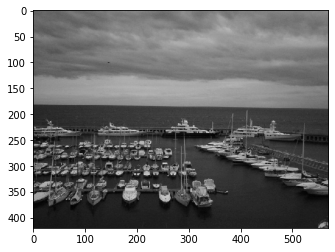

In [3]:
file_dir = 'images/'
file_name = 'boat'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/boat.png"
  img_gray,_ = read_image(file_name+file_ext)
else:
  img_gray,_ = read_image(file_dir+file_name+file_ext)

display_image(img_gray)
img_gray.shape

As you can see, this image has pretty bad contrast : it is difficult to see in it. Now, display the histogram of this image to show this (see the intro to images notebook for help)

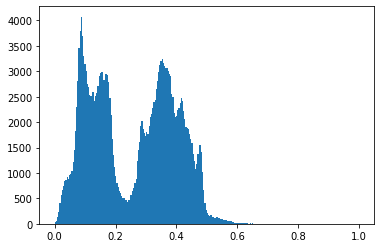

In [8]:
# FILL IN CODE
Hist = plt.hist(img_gray.flatten(), bins=np.linspace(0,1,257))

You will notice that the histogram is not very well spread out over the whole range of the image. We are going to correct this in this part of the TP, by imposing a __uniform histogram__ on the image.

Firstly, calculate the cumulative histogram $H$ of the image and display it (use the np.cumsum function).

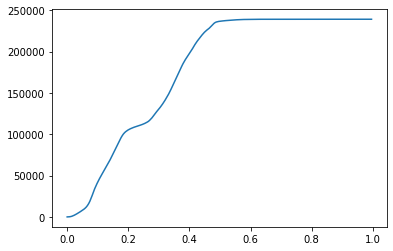

In [5]:
# FILL IN CODE
cum_hist=np.cumsum(Hist[0])
plt.plot(Hist[1][:-1],cum_hist)

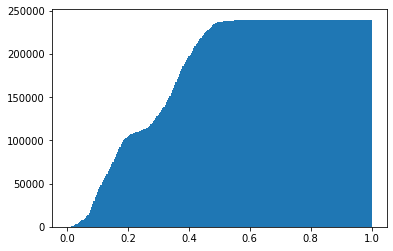

In [6]:
R = plt.hist(img_gray.ravel(), bins = np.linspace(0,1,257), cumulative = True)

## Histogram equalisation

Now, if we apply the cumulative histogram $H$ as a contrast change, then we are imposing a uniform histogram on the image (see the lesson slides). A contrast change means we do not change the order of the __values__ of the pixels. We are going to use $H$ as a type of lookup table to find the new values of the image.

In practice, this can be done with the following method :

- normalise the cumulative histogram such that the largest value is 1.0. This will map the final image to the interval $0, \dots, 1$ (you will still have a discrete list of values, but floating point ones)
- convert the image grey-levels back to the interval $\{0, \dots 255\}$ as int values (use the n. This will allow us to use these values as indices in H
- apply the cumulative histogram to the values of the image pixels

Implement this algorithm now in a function ``equalize_histogram``. __Note__ In the ``np.histogram`` function, the histogram values have one less element than the histogram bins

In [9]:
def equalize_histogram(img_in):
    # FILL IN CODE
    Hist,_ = np.histogram(img_in.flatten(), bins=np.linspace(0,1,257))
    H=np.cumsum(Hist)
    #normalizing the cumulative histogram
    H=(H-np.min(H))/(np.max(H)-np.min(H))
    img_equalise=img_in.copy()
    img_equalise=255*img_equalise
    n,m=img_equalise.shape
    for i in range(n):
      for j in range(m):
        img_equalise[i,j]=H[int(img_equalise[i,j])]
    return img_equalise

Carry out the algorithm on the input image and display the image. Is the result better ?

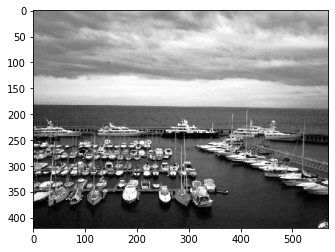

In [10]:
img_gray_equalise = equalize_histogram(img_gray)
display_image(img_gray_equalise)

We see that the resulted image has better contrast than the initial one. Some pixel intensities seem to have been mapped to higher values.

Now, display both the histogram and cumulative histogram of the equalised image

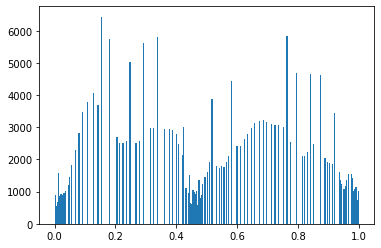

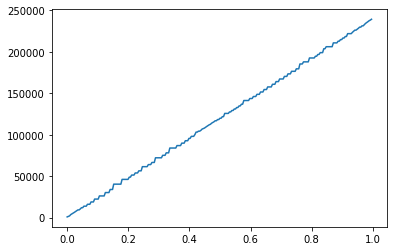

In [11]:
hist_vals, hist_bins,_ = plt.hist(img_gray_equalise.flatten(), bins=np.linspace(0,1,257))
plt.figure()
plt.plot(hist_bins[:-1],hist_vals.cumsum())

__Questions__ Is the histogram of the equalised image perfectly uniform (flat) ? Why is this the case ?

__Answer__ Although the cumulative histogram is very similar to the one of a uniform distribution, the histogram of the equaliser image is not perfectly uniform. This is due to the fact that in practice, we dispose only of a finite number of values to simulate the uniform distribution. This is not sufficient for the task. However we could spread the values among the $[0,1]$ interval and obtain better contrast.

### Colour images

Let us try to apply our algorithm to a colour image. First, let's read the image and display it

--2021-11-28 20:38:33--  https://perso.telecom-paristech.fr/anewson/doc/images/alps_contrast.png
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1501758 (1.4M) [image/png]
Saving to: ‘alps_contrast.png’

alps_contrast.png   100%[===================>]   1.43M  3.12MB/s    in 0.5s    

2021-11-28 20:38:34 (3.12 MB/s) - ‘alps_contrast.png’ saved [1501758/1501758]



(761, 1142, 3)

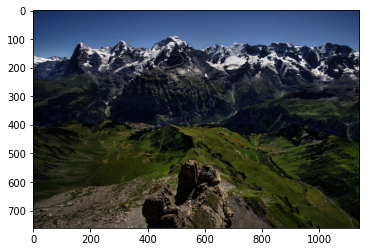

In [12]:
file_dir = 'images/'
file_name = 'alps_contrast'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/alps_contrast.png"
  _,img_color = read_image(file_name+file_ext)
else:
  _,img_color = read_image(file_dir+file_name+file_ext)

display_image(img_color)
img_color.shape

Now, create a function ``equalize_histogram_color`` which uses your grey-level function to carry out colour histogram equalisation in each colour channel independently, and display the output image. Careful to

- normalise the input range to $0, \dots, 1$ for each channel when processing it
- put the output range back to $0, \dots, 255$ when displaying.

To view the result better, you can write it to a file.

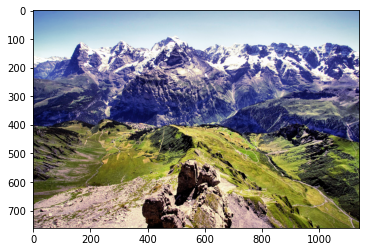

In [13]:
def equalize_histogram_color(img_color):
    # FILL IN CODE
    img_color_equalized=img_color.copy()
    img_color_equalized=img_color_equalized/255
    n=img_color.shape[-1]
    for i in range(n):
      img_color_equalized[:,:,i]=equalize_histogram(img_color_equalized[:,:,i])
    return img_color_equalized


img_color_equalized = equalize_histogram_color(img_color)
display_image(255.0 * img_color_equalized)

write_image(img_color_equalized,file_name+'_equalised.png')

__Question__ Do you think this result looks right ? What may be wrong in our approach ? What could be a solution to this ?

__Answer__ By performing histogram equalization separately on the three channels of the image, we don't get a good result. For example we see that the far away mountains are influenced by the blue color. This problem is due to the fact that by treating each color channel separately we don't take into consideration the correlation between different colors. Thus, the result of histograms equalization is not good.

As a solution, we propose to map the image into the **hsv** representation.
Then we perform histogram equalization on the value channel while the Hue and Saturation channels keep the color information.

In [12]:
from skimage.color import rgb2hsv,hsv2rgb
img=rgb2hsv(img_color)

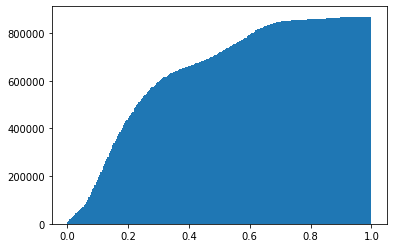

In [13]:
H,S,V=img[:,:,0],img[:,:,1],img[:,:,2]
_ = plt.hist(V.ravel(), bins = np.linspace(0,1,257), cumulative = True)

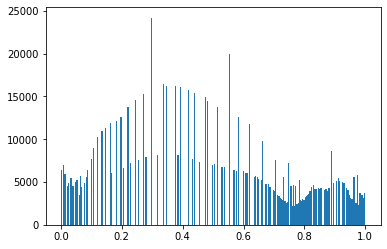

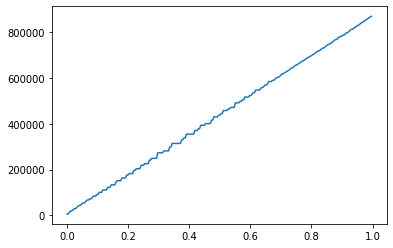

In [14]:
V_eq=equalize_histogram(V)               # equalize_histogram of value channel

hist_vals, hist_bins,_ = plt.hist(V_eq.flatten(), bins=np.linspace(0,1,257))
plt.figure()
plt.plot(hist_bins[:-1],hist_vals.cumsum())

In [15]:
Res=img.copy()
Res[:,:,-1]=255*V_eq
Res.shape

(761, 1142, 3)

In [16]:
Res_RGB=hsv2rgb(Res)

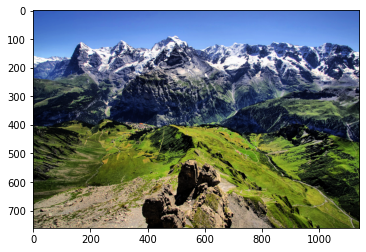

In [17]:
display_image(Res_RGB)

We see how the resulted image is much more better then "img_color_equalized". The contrast is also enhanced compared to the initial image. 